# Global Biases

This notebook evaluate the Global Biases and plot it. If you're running the script to reproduce the figure, only the second part of the notebook will be needed.

In [1]:
from aqua import Reader
from aqua.diagnostics import GlobalBiases

In [2]:
model = 'IFS-NEMO'
exp = 'historical-1990'
source = 'lra-r100-monthly'
plev = 85000

model_obs = 'ERA5'
exp_obs = 'era5'
source_obs = 'monthly'
startdate_obs = "1990-01-01"
enddate_obs = "2020-12-31"


reader_ifs_nemo = Reader(model=model, exp=exp, source=source)
data_ifs_nemo = reader_ifs_nemo.retrieve(startdate=None, enddate=None)

reader_era5 = Reader(model=model_obs, exp=exp_obs, source=source_obs)
data_era5 = reader_era5.retrieve(startdate=startdate_obs, enddate=enddate_obs)


In [3]:
global_biases = GlobalBiases(data=data_ifs_nemo, data_ref=data_era5, var_name='u', loglevel = 'INFO', plev=plev,
                              model=model, exp=exp,
                              model_obs=model_obs, startdate_obs=startdate_obs, enddate_obs=enddate_obs)

2025-02-04 16:30:13 :: Global Biases :: INFO     -> Selecting pressure level 85000 for variable u.
2025-02-04 16:30:13 :: Global Biases :: INFO     -> Selecting pressure level 85000 for variable u.


# Plot the results

2025-02-04 16:30:13 :: Global Biases :: INFO     -> Plotting global biases.
2025-02-04 16:30:13 :: Global Biases :: INFO     -> Plotting bias map between two datasets.


Text(0.5, 0, 'Zonal component of the wind [m s**-1]')

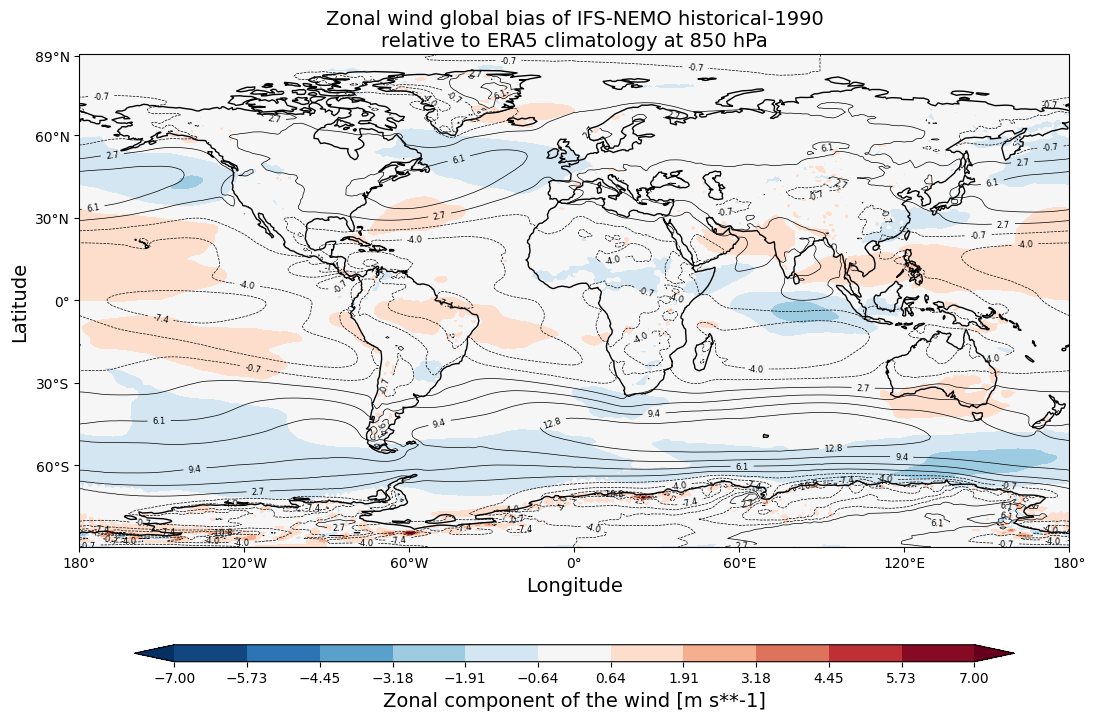

In [4]:
fig, ax, netcdf  = global_biases.plot_bias(vmin= -7, vmax = 7)

title = (f"Zonal wind global bias of {model} {exp}\n"
         f"relative to {model_obs} climatology" + (f" at {int(plev / 100)} hPa" if plev else ""))

ax.set_title(title, fontsize=14)

ax.set_xlabel("Longitude", fontsize=14)
ax.set_ylabel("Latitude", fontsize=14)


cbar_ax = fig.axes[1]  
cbar_ax.set_xlabel("Zonal component of the wind [m s**-1]", fontsize=14)

In [5]:
fig.savefig("zonal_wind_bias.pdf", format="pdf", bbox_inches="tight")